#                                    Analyse de la base de données des mails

##  Load Data

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import sklearn

In [4]:
#Defining variables
file_name = "./Documents/Priorisation de mails/n16_juin_juillet2022.xlsx"
start_month = 6
end_month = 7

In [7]:

xl_file = pd.ExcelFile(file_name, engine='openpyxl', )
df = xl_file.parse('Sheet1')
df = df[df['Date_Sent'].dt.month <= end_month] 
df = df[df['Date_Sent'].dt.month >= start_month] 

In [8]:
len(df)

37

In [183]:
# df.info()

# Analyse Data

## 1 - Informations générales :

In [12]:
## envoyé par IDEA

s = 'groupe-idea'
s = s.lower()

S = 0
for element in df['From (address)'] :
    a = str(element).lower()
    if s in a:
        S = S+1
print("nombez de mails envoyés par IDEA : ",S)
print("nombre de mails envoyé par les autres expéditeurs : ", len(df)-S)

nombez de mails envoyés par IDEA :  5
nombre de mails envoyé par les autres expéditeurs :  32


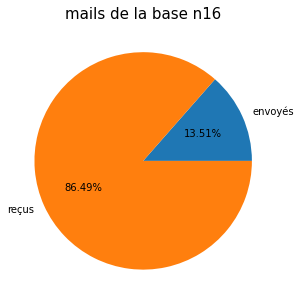

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10,5))
plt.title("mails de la base n16", fontsize = 15)
plt.pie([S,len(df)-S], labels=['envoyés','reçus'],autopct='%1.2f%%',textprops={'fontsize': 10})
#plt.legend()
plt.show()

# plt.savefig('Pictures\\fig1111.png', dpi='figure', format='png')

<Figure size 720x360 with 0 Axes>

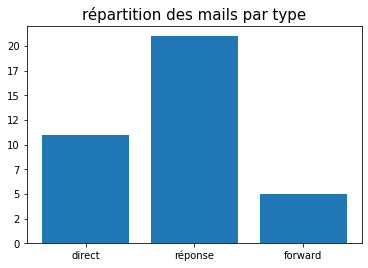

In [14]:

u = 're'
v = ['fw','fwd','tr']


direct = 0
re = 0
fw = 0

for i, row in df.iterrows():  
    element = row['Subject']
    if str(element).lower().startswith(u) : 
        df.loc[i,'type'] = 're'
        re = re + 1
    elif list(filter(str(element).lower().startswith, v)) != [] :
        fw = fw+1
        df.loc[i,'type'] = 'fwd'
    else :
        direct = direct + 1
        df.loc[i,'type'] = 'direct'

plt.figure(1, figsize=(10,5))
fig, ax = plt.subplots()
# plt.bar(list(set(df['type'].to_list())),rec_df['type'].value_counts().to_list())
plt.bar(['direct','réponse','forward'],[direct,re,fw])
plt.title("répartition des mails par type",fontsize = 15)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

## 2 - Nombre de mails envoyés par les entreprises 

In [17]:
## Autres expéditeurs

#others_unique = [x for x in df['From (address)'].unique() if not (str(x).lower()).startswith(s)]
others = [x for x in df['From (address)'] if not (s in x)]
print(len(others))
# print("nombre d'expéditeurs : ",len(others_unique))
# others_unique

32


In [18]:
## Entreprises expéditrices autre qu'IDEA

ent=[]
char1 = '@'
char2 = '.'
for element in others :
    ent.append(str(element)[str(element).find(char1)+1 : str(element).rfind(char2)])


while 'na' in ent :
    ent.remove('na')
    
ent_unique=list(set(ent))

# print(len(ent))
# print("nombre d'entreprises : ",len(ent_unique))
# print('liste des entreprise expéditrices : ')
# ent_unique
    

In [19]:
counts = []
for element in ent_unique : 
#     print('nombre de mail envoyé par ',element,' : ',ent.count(element))
    counts.append(ent.count(element))

In [20]:

data = {'entreprise':ent_unique,'nombre de mails':counts}
nb_mails = pd.DataFrame(data)
nb_mails.sort_values(by=['nombre de mails'],ascending=False,ignore_index=True)

# for i in range(len(nb_mails["nombre de mails"])):
#     nb_mails["nombre de mails"][i] = "{:,}".format(nb_mails["nombre de mails"][i]).replace(',', ' ')
    
# nb_mails

,entreprise,nombre de mails
0,airbus,21
1,dhl,9
2,mecachromegroup,1
3,heppner-group,1


In [21]:
x = 0
nb_mails1 = nb_mails

oth = []

print(len(nb_mails))
for i in range(len(nb_mails)):
    
    if nb_mails.iloc[i]['nombre de mails']<10:
        
        x = x + nb_mails.iloc[i]['nombre de mails']
        
        oth.append(nb_mails.iloc[i]['entreprise'])
        nb_mails1 = nb_mails1.drop([i])
        
nb_mails1 = nb_mails1.append({'entreprise': 'other',
                         'nombre de mails': x}, ignore_index=True)

nb_mails1.sort_values(by=['nombre de mails'],ascending=False,ignore_index=True)

# for i in range(len(nb_mails1['nombre de mails'])):
#     nb_mails1["nombre de mails"][i] = "{:,}".format(nb_mails1["nombre de mails"][i]).replace(',', ' ')
    
nb_mails1

4


,entreprise,nombre de mails
0,airbus,21
1,other,11


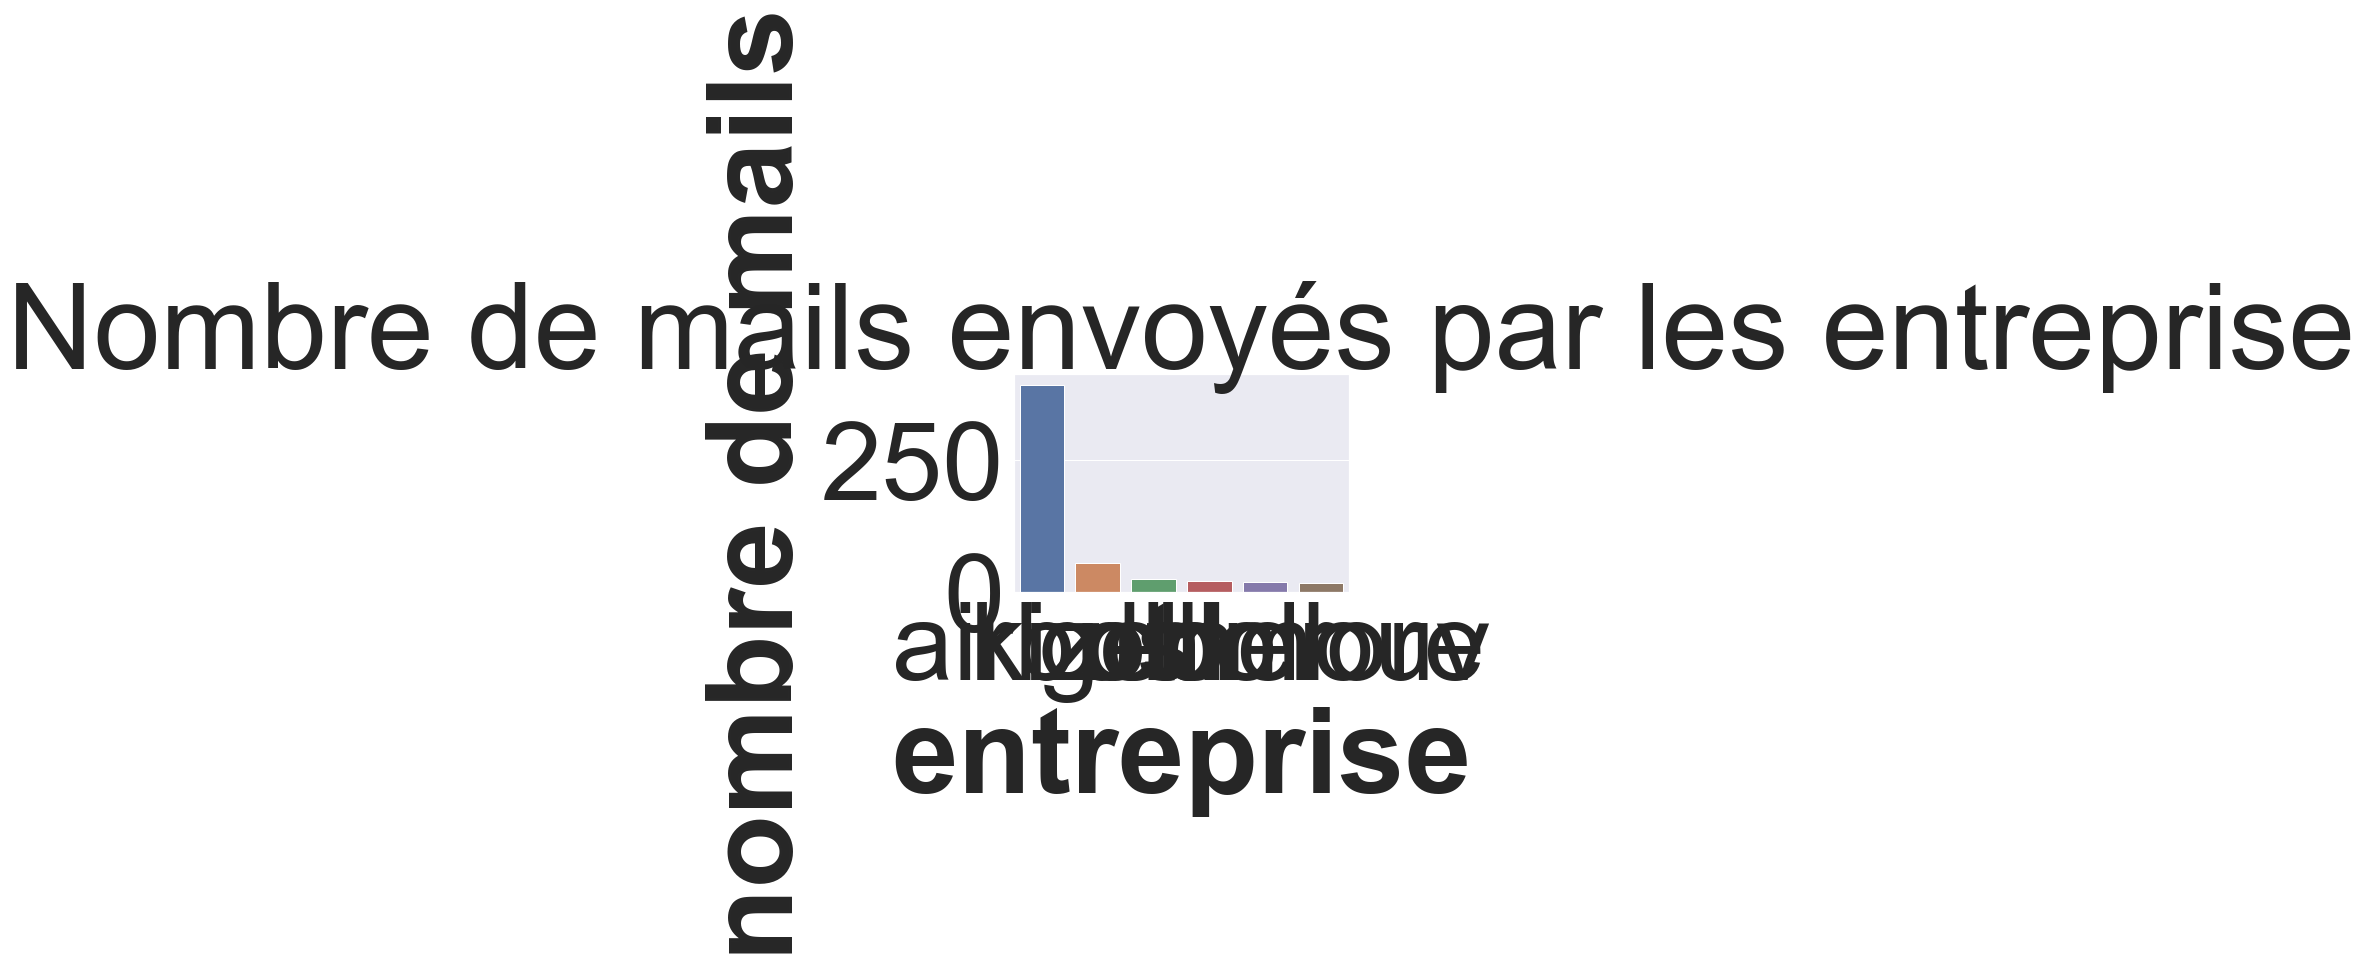

In [150]:
import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

# plt.figure(figsize=(7,5))
# make barplot and sort bars

fig, ax = plt.subplots()
# sns.set(font_scale=10)
sns.barplot(x='entreprise',
            y="nombre de mails", 
            data=nb_mails1, 
            order=nb_mails1.sort_values('nombre de mails',ascending=False).entreprise)

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Nombre de mails envoyés par les entreprise")
plt.tight_layout()
plt.show()
#plt.savefig("sort_bars_in_barplot_ascending_order_Seaborn_Python.png", dpi=100)

## 2bis - Nombre de mails envoyés par personne :

In [36]:
## Entreprises expéditrices autre qu'IDEA (personnes)

personnes=[]
char = '@'

for element in others :
    personnes.append(str(element)[ : str(element).find(char)])


# while 'na' in ent :
#     ent.remove('na')

personnes_unique=list(set(personnes))

ent_per = []

for personne in personnes:
    for element in others :
        if str(personne) in str(element):
            ent_per.append(str(element)[str(element).find(char1)+1 : str(element).rfind(char2)])
            break 

counts_per_month1 = []
df_temp = df[df['Date Sent'].dt.month == start_month]
for element in personnes_unique:
    c = 0
    for idx, row in df_temp.iterrows():
        if str(element) in str(row['From (address)']):
            c = c + 1
    counts_per_month1.append(c)

counts_per_month2 = []
df_temp = df[df['Date Sent'].dt.month == start_month + 1]
for element in personnes_unique:
    c = 0
    for idx, row in df_temp.iterrows():
        if str(element) in str(row['From (address)']):
            c = c + 1
    counts_per_month2.append(c)

counts_per_month3 = []
df_temp = df[df['Date Sent'].dt.month == start_month + 2]
for element in personnes_unique:
    c = 0
    for idx, row in df_temp.iterrows():
        if str(element) in str(row['From (address)']):
            c = c + 1
    counts_per_month3.append(c)
    

prénoms = []
for i in range(len(personnes_unique)):
    
    element = personnes_unique[i]
    element = element.replace('.',' ')
            
    prénoms.append(element)



# print(len(ent))
# print("nombre d'entreprises : ",len(ent_unique))
# print('liste des entreprise expéditrices : ')
# ent_unique

In [37]:
ent_per_unique = []

for element in personnes_unique :
    i = personnes.index(element)
    ent_per_unique.append(ent_per[i])
    

In [38]:
counts_personnes = []
for element in personnes_unique : 
    #print('nombre de mail envoyé par ',element,' : ',personnes.count(element))
    counts_personnes.append(personnes.count(element))

In [39]:
data = {'personne':prénoms,'entreprise':ent_per_unique,'nombre de mails':counts_personnes, 'mois 6':counts_per_month1,'mois 7':counts_per_month2,'mois 8':counts_per_month3}
top_senders = pd.DataFrame(data)
top_senders = top_senders.sort_values(by='nombre de mails',ascending = False,ignore_index = True)

print('top 5 senders : ',top_senders['personne'].to_list()[0:5])
    
top_senders.loc[:4,:]

top 5 senders :  ['via', 'gaetan guine external', 'isabelle joyau', 'vanessa drugeon', 'jean-charles le-queau']


,personne,entreprise,nombre de mails,mois 6,mois 7,mois 8
0,via,kizeo,54,24,18,12
1,gaetan guine external,airbus,40,23,8,9
2,isabelle joyau,airbus,36,19,13,4
3,vanessa drugeon,airbus,26,14,4,8
4,jean-charles le-queau,airbus,19,6,10,3


## 3 - Nombre de mails envoyés par Airbus internes vs externes :

In [40]:
#Airbus : mails internes vs externes 

exter = 0
inter = 0
 
for element in others :
    if "@airbus." in str(element).lower() :
        if "external" in str(element).lower():
            exter = exter + 1
        else :
            inter = inter + 1
    
print("nombre d'externes : ", exter, "(30%)")
print("nombre d'internes : ", inter,"(70%)")
print(exter + inter)

nombre d'externes :  139 (30%)
nombre d'internes :  253 (70%)
392


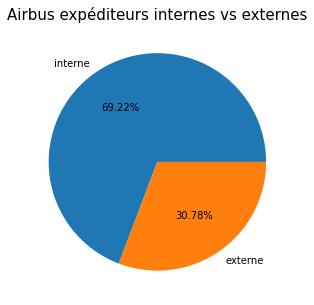

In [42]:
plt.figure(1, figsize=(10,5))
plt.title("Airbus expéditeurs internes vs externes",fontsize = 15)
plt.pie([848,377], labels=['interne','externe'],autopct='%1.2f%%',textprops={'fontsize': 10})
plt.show()

## 4 - Nombre de mails échangés par mois :

In [43]:
df1 = df[['Date Sent', 'From (address)','To (address)']]
df2 = df1.groupby([df1['Date Sent'].dt.year.rename('year'), df1['Date Sent'].dt.month.rename('month')]).agg({'count'})
df3 = df1.groupby([df1['Date Sent'].dt.year.rename('year'), df1['Date Sent'].dt.month.rename('month')])


In [44]:
monthly_IDEA = []
monthly_others = []

for e in df3.groups.keys():
    temp = df3.get_group(e)
    S = 0
    for element in temp['From (address)'] :
        a = str(element).lower()
        if a.startswith(s):
            S = S+1
    monthly_IDEA.append(S)
    monthly_others.append(len(temp)-S)
#monthly_IDEA

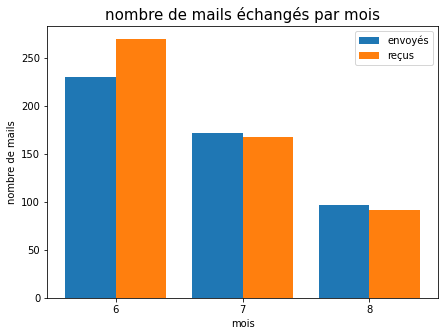

In [50]:
months = list(range(start_month,end_month+1))
X_axis = np.arange(len(months))
plt.figure(1, figsize=(7,5))  
plt.bar(X_axis - 0.2, monthly_IDEA, 0.4, label = 'envoyés')
plt.bar(X_axis + 0.2, monthly_others, 0.4, label = 'reçus')
  
plt.xticks(X_axis, months)
plt.xlabel("mois")
plt.ylabel("nombre de mails")
plt.title("nombre de mails échangés par mois",fontsize = 15)
plt.legend()
plt.show()

## 5 - Nombre de mails envoyés par entreprise par mois :

In [51]:
#Analyse par mois des mails envoyés par IDEA

monthly_envois = dict()
for element in months :
    monthly_envois[str(element)] = [0]*len(ent_unique)
    
#print(monthly_envois)
for e in df3.groups.keys():
    temp = df3.get_group(e)
    #temp.info()
    for f in temp['To (address)']:
        for element in ent_unique : 
            if element in str(f).lower():
                monthly_envois[str(e[1])][ent_unique.index(element)] = monthly_envois[str(e[1])][ent_unique.index(element)]+ 1
    #print(monthly_envois)
        

In [52]:
print("  **mail envoyé par IDEA par entreprise par mois**")
new1 = pd.DataFrame.from_dict(monthly_envois)
new1.insert(0, "entreprise", ent_unique, True)



  **mail envoyé par IDEA par entreprise par mois**


In [ ]:
# df3.groups.keys()

In [53]:
#monthly counts par entreprise 

keyList = ["entreprise"]
for e in months :
    keyList.append(str(e))

d = {key: [] for key in keyList}

for element in ent_unique :
    d['entreprise'].append(element)
    for e in df3.groups.keys():
        temp = df3.get_group(e)
        S = 0
        t = [x for x in temp['From (address)'] if not (str(x).lower()).startswith(s)]
        x = sum(element in str(s).lower() for s in t)
        d[str(e[1])].append(x)
        
            

In [54]:
new = pd.DataFrame.from_dict(d)

 
new.sort_values(by=['6'],ascending=True,ignore_index=True)
new

,entreprise,6,7,8
0,stelia-aerospace,0,3,0
1,bollore,6,10,0
2,dhl,17,7,1
3,magellan,0,1,0
4,external.stelia-aerospace,0,1,0
5,daher,5,1,1
6,duqueine,1,0,0
7,nexteam-group,1,0,0
8,groupe-idea,0,1,0
9,trigo-group,1,3,1


In [55]:
new3 = new.sum(axis=1).to_frame().join(new1.sum(axis=1).to_frame(), lsuffix='_reçus', rsuffix='_envoyés')
new3.insert(0, "entreprise", ent_unique, True)
# new3

In [163]:
#new3.sum(axis=0)

In [39]:
#df3 = df1.groupby([df1['Date Sent'].dt.year.rename('year'), df1['Date Sent'].dt.month.rename('month')]).agg({'count'})

In [ ]:
# df1.info()

In [ ]:
# df2['Date Sent']['count']

In [ ]:
# plt.bar([2,3,4,5,6,7,8,9],df2['Date Sent']['count'])
# plt.title("nombre de mails échangés par mois 2021")
# plt.show()

In [ ]:
# plt.bar([2,3,4,5,6,7,8,9],monthly_IDEA)
# plt.title("nombre de mails envoyés par mois 2021")
# plt.show()

In [ ]:
# months = [2,3,4,5,6,7,8,9]
# plt.bar(months,monthly_others)
# plt.title("nombre de mails reçus par mois 2021")
# plt.show()

In [ ]:
# print(monthly_IDEA )
# print(monthly_others)
# print(df2['Date Sent']['count'])

In [ ]:
# print("nombre de mail directs : ", direct)
# print("nombre de réponses : ",re)
# print("nombre de forward : ",fw)
# direct  + re + fw

## Nombre de destinataires par mail :

In [56]:
def replace_substring(string, substr, new):
    
    i = 0
    while i < len(string) - len(substr) + 1:
        # Check if substring starts at i
        #print(string[i:i+len(substr)])
        if string[i:i+len(substr)] == substr:
            v = string[:i]+new+string[i+len(substr):]
            string = v
            break   
        i += 1
    
    return string

In [57]:
df_new = df
nb_destinataires = []
c=[]
b=[]

for element in df_new['To (address)'] :
    w = str(element).lower()
    w = replace_substring(w, s, '@IDEA')
    #print(w.count('@'))
    nb_destinataires.append(w.count('@'))
#nb_destinataires =list(set(nb_destinataires))
for x in list(set(nb_destinataires)):
    b.append(x)
    c.append(nb_destinataires.count(x))
    #print('nombre de mails avec ',x,'destinataire : ',nb_destinataires.count(x))
#plt.hist(nb_destinataires)



In [167]:
# fig, ax = plt.subplots()
# plt.bar(b,c)
# plt.xlabel('nombre de destinataires')
# plt.ylabel('nombre de mails')
# plt.title('nombre de mails ayant x nombre de destinataires')
# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# plt.show()

In [167]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

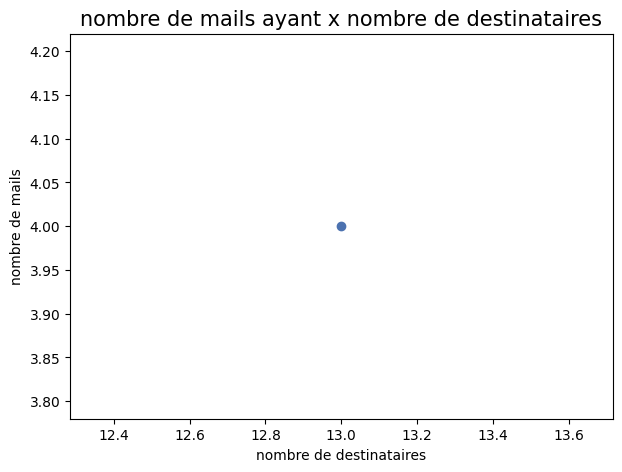

In [168]:
plt.figure(1, figsize=(7,5)) 

#fig, ax = plt.subplots()
plt.scatter(b,c,color='b')
plt.xlabel('nombre de destinataires')
plt.ylabel('nombre de mails')
plt.title('nombre de mails ayant x nombre de destinataires',fontsize = 15)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

In [65]:
#Dayaframe des mails envoyés

env_df = df
env_df['From (address)'] = env_df['From (address)'].replace('-', np.nan)
env_df = env_df.dropna(axis=0, subset=['From (address)'])

env_df = env_df[env_df['From (address)'].str.lower().str.contains(s)] 

In [66]:
len(env_df)

499

In [67]:
rec_df = df 
rec_df['From (address)'] = rec_df['From (address)'].replace('-', np.nan)
rec_df = rec_df.merge(env_df, how="left", left_on=df.columns.values.tolist(), right_on=df.columns.values.tolist(), indicator=True)
rec_df = rec_df.query("_merge == 'left_only'")[df.columns.values.tolist()]

## Nature des mails : question, alerte de risque, simple information

In [68]:
#question : point d'interrogation, vocabulaire (demande..)
#alerte de risque : point d'exclamation, vocabulaire (risque, urgent, litige)
#simple information : le reste

vocab_risque = ["risque","urgent","litige"]

nature = []

for idx, row in rec_df.iterrows():
    #question
    if len(set(['re','re:','réponse'])&set(str(row['Subject']).lower().split())) == 0:
        if  len(set(['?','demande','svp','pouvez-vous'])&(set(str(row['Body']).lower().split())|set(str(row['Subject']).lower().split()))) != 0:
            nature.append("question")
        elif len(set(vocab_risque)&(set(str(row['Body']).lower().split())|set(str(row['Subject']).lower().split()))) != 0:
            nature.append("alerte de risque")
        else :
            nature.append("simple information")
    
    else :
        nature.append("simple information")
        
            
                                 

In [69]:
rec_df = rec_df.assign(nature = nature)
# rec_df

In [101]:
# rec_df['nature'].value_counts().to_list()

In [123]:
#print([nature.count('simple information'),nature.count('question'),nature.count('alerte de risque')])

[444, 80, 6]


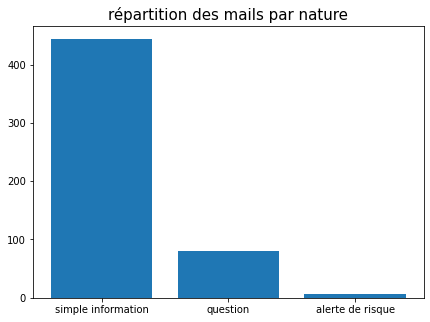

In [72]:
plt.figure(1, figsize=(7,5)) 

#fig, ax = plt.subplots()
plt.bar(['simple information','question','alerte de risque'], [nature.count('simple information'),nature.count('question'),nature.count('alerte de risque')])
plt.title("répartition des mails par nature",fontsize = 15)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

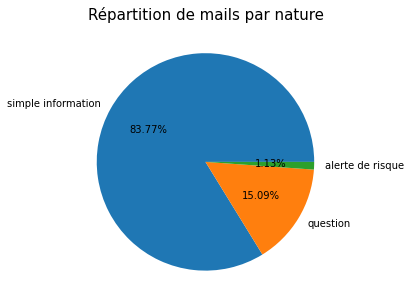

In [74]:
plt.figure(1, figsize=(10,5))
plt.title("Répartition de mails par nature",fontsize = 15)
plt.pie([nature.count('simple information'),nature.count('question'),nature.count('alerte de risque')], labels=['simple information','question','alerte de risque'],autopct='%1.2f%%',textprops={'fontsize': 10})
plt.show()

In [75]:
#Analyse par mois

df_nature = pd.DataFrame(columns = ['mois', 'simple information', 'question','alerte de risque'])

rec_df_groups = rec_df.groupby([rec_df['Date Sent'].dt.month.rename('month')])

In [76]:

i = 6 
for group_key, group_value in rec_df_groups:
    group = rec_df_groups.get_group(group_key)
    
    nature = []
      
    for idx, row in group.iterrows():
    #question
        if len(set(['re','re:','réponse'])&set(str(row['Subject']).lower().split())) == 0:
            if  len(set(['?','demande','svp','pouvez-vous'])&(set(str(row['Body']).lower().split())|set(str(row['Subject']).lower().split()))) != 0:
                nature.append("question")
            elif len(set(vocab_risque)&(set(str(row['Body']).lower().split())|set(str(row['Subject']).lower().split()))) != 0:
                nature.append("alerte de risque")
            else :
                nature.append("simple information")

        else :
            nature.append("simple information")
    print([*[i],*[nature.count('simple information'),nature.count('question'),nature.count('alerte de risque')]])
    
    df_nature.loc[len(df_nature)] = [*[i],*[nature.count('simple information'),nature.count('question'),nature.count('alerte de risque')]]
    i = i + 1
        



[6, 227, 40, 3]
[7, 137, 29, 2]
[8, 80, 11, 1]


In [77]:
df_nature

,mois,simple information,question,alerte de risque
0,6,227,40,3
1,7,137,29,2
2,8,80,11,1


## Répartition des mails par nombre d'échanges :

In [78]:
df_direct = df[df['type'].isin(['direct','fwd']) ]
df_rep = df[df['type']=='re']
len(df_direct)

456

In [291]:
# len(df_rep)

In [79]:
import datetime
ech = []
temps= []
for idx, row in df_direct.iterrows():
    sujet = str(row['Subject'])
    start = datetime.datetime.strptime(str(row['Date Sent']),"%Y-%m-%d %H:%M:%S")
    c = 0
    ech_times = []
    for i, r in df_rep.iterrows():
        if sujet in str(r["Subject"]) :
            ech_times.append(datetime.datetime.strptime(str(r['Date Sent']),"%Y-%m-%d %H:%M:%S"))            
            c = c+1
    if len(ech_times)>0 :
        if max(ech_times)>start :
            x = (max(ech_times) - start)
            x = (x.days)*24 + (x.seconds)/3600
            temps.append(x)
    
    
    ech.append(c)

In [80]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [83]:
t4 = 0
t24 = 0
t72 = 0
t_plus = 0

for x in temps :
    if x<4:
        t4 = t4 + 1
    elif x<24 :
        t24 = t24 + 1
    elif x<72 :
        t72 = t72 + 1
    else :
        t_plus = t_plus + 1

perc = [str(t4/sum(y))+'%',str(t24/sum(y))+'%',str(t72/sum(y))+'%',str(t_plus/sum(y))+'%']
        
print(perc)
#print(sum([t4,t24,t72,t_plus]))

['0.4329268292682927%', '0.27439024390243905%', '0.10975609756097561%', '0.18292682926829268%']


<Figure size 720x360 with 0 Axes>

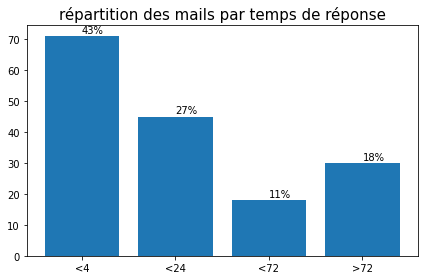

In [86]:
x = ['<4' , '<24', '<72', '>72']
y = [t4,t24,t72,t_plus]

plt.figure(1, figsize=(10,5))
fig, ax = plt.subplots()

# width = 0.35
# pps = ax.bar(x, y, width, align='center')


# for p in pps:
#    height = p.get_height()
#    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
#       s="{}%".format(height),
#       ha='center')
    
ax.bar(x,y)

for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{round((data/sum(y)*100))}"+"%" , fontdict=dict(fontsize=10))

plt.title("répartition des mails par temps de réponse",fontsize =15 )
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()
#addlabels(['<4' , '<24', '<72', '>72'], perc)

#plt.show()

In [224]:
# plt.hist(temps, bins = 50)


In [87]:
counts_ech = []
for element in list(set(ech)) : 
    #print('nombre de mail envoyé par ',element,' : ',personnes.count(element))
    counts_ech.append(ech.count(element))

In [227]:


# fig, ax = plt.subplots()
# plt.bar(list(set(ech)),counts_ech)
# plt.title("Répartition des mails par nombre d'échanges")
# ax.get_yaxis().set_major_formatter(
# matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# plt.show()

In [159]:
plt.rcParams.update(matplotlib.rcParamsDefault)

<Figure size 700x500 with 0 Axes>

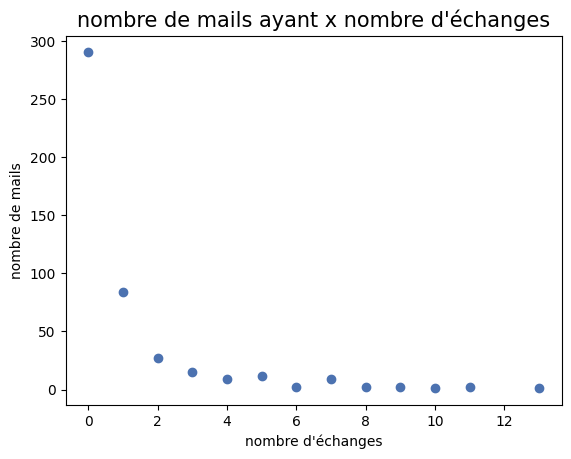

In [162]:
plt.figure(1, figsize=(7,5))

fig, ax = plt.subplots()
plt.scatter(list(set(ech)),counts_ech,color='b')
plt.xlabel("nombre d'échanges")
plt.ylabel('nombre de mails')
plt.title("nombre de mails ayant x nombre d'échanges",fontsize = 15)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

## Analyse par jour

In [90]:
import datetime

df['day_of_week'] = df['Date Sent'].dt.day_name()
df['time'] = df['Date Sent'].dt.time

# import locale

# locale.setlocale(locale.LC_ALL,"fr_FR")
# for i in df.index :
#       df['day_of_week'][i] = datetime.datetime.strftime(df['day_of_week'][i],"%a")
        
        
for idx, row in df.iterrows():
    if row['time']<datetime.time(12,0,0) :
        df.loc[idx,'time'] = 'am'
    else:
        df.loc[idx,'time'] = 'pm'


In [84]:
# df

In [91]:
groups = df.groupby(['day_of_week', 'time'])

In [92]:
liste = []
for group_key, group_value in groups:
    liste.append(group_key)
    #print(group_value)
liste

[('Friday', 'am'),
 ('Friday', 'pm'),
 ('Monday', 'am'),
 ('Monday', 'pm'),
 ('Thursday', 'am'),
 ('Thursday', 'pm'),
 ('Tuesday', 'am'),
 ('Tuesday', 'pm'),
 ('Wednesday', 'am'),
 ('Wednesday', 'pm')]

In [93]:
analyse_par_jour = pd.DataFrame(liste, columns =['day', 'hour'])

In [94]:
avgs = []
b = 0
for group_key, group_value in groups:
    group = groups.get_group(group_key)
    dates = []
    for idx, row in group.iterrows():
        dates.append(row['Date Sent'].date())
    dates = list(set(dates))
    if b<len(dates):
        b = len(dates)
    #print(group)
    avgs.append(len(group))
avgs = np.divide(avgs,b)

In [95]:
analyse_par_jour = analyse_par_jour.assign(moyenne_mesuelle_mails=avgs)

In [96]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
analyse_par_jour['day'] = pd.Categorical(analyse_par_jour['day'], categories=cats, ordered=True)
analyse_par_jour = analyse_par_jour.sort_values('day')
analyse_par_jour

,day,hour,moyenne_mesuelle_mails
2,Monday,am,7.769231
3,Monday,pm,9.076923
6,Tuesday,am,8.769231
7,Tuesday,pm,11.461538
8,Wednesday,am,8.307692
9,Wednesday,pm,6.384615
4,Thursday,am,9.769231
5,Thursday,pm,4.538462
0,Friday,am,8.153846
1,Friday,pm,4.923077


In [97]:
groups = analyse_par_jour.groupby(['hour'])

In [240]:
# group = groups.get_group('am')#['moyenne_mensuelle_mails']
# group['moyenne_mesuelle_mails'].to_list()

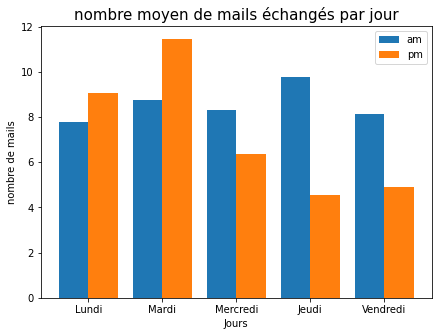

In [100]:
plt.figure(1, figsize=(7,5))

Days = ['Lundi','Mardi','Mercredi','Jeudi','Vendredi']
X_axis = np.arange(len(Days))
  
plt.bar(X_axis - 0.2, groups.get_group('am')['moyenne_mesuelle_mails'].to_list(), 0.4, label = 'am')
plt.bar(X_axis + 0.2, groups.get_group('pm')['moyenne_mesuelle_mails'], 0.4, label = 'pm')
  
plt.xticks(X_axis, Days)
plt.xlabel("Jours")
plt.ylabel("nombre de mails")
plt.title("nombre moyen de mails échangés par jour",fontsize = 15)
plt.legend()
plt.show()